# MatPlotLib plot típusok
Az alapok átnézése után nézzünk meg egy néhány másik plot típust is.
A megfelelő plot típus kiválasztása az egyik legfontosabb lépés a plot elkészítésésnél, hiszen rengeteg nagyon jó formátum létezik, viszont mindegyiknek más az erőssége.

Ha nem tudjuk, hogy mivel induljunk inspirációnak ajánlom a következő oldalt:

https://matplotlib.org/stable/gallery/index.html

Ebben a Notebookban a leggyakrabban használt plot típusokon megyünk végig egy pár hasznos beállításukkal, de fenti linken minden verzióra található egy egyszerű példa, amiből ki lehet indulni.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Bar plot
Az oszlopdiagramot valószínűleg senkinek nem kell bemutatnom, és természetesen matplotlibben is megtalálható.

In [2]:
caeSzabi21 = {'Január':20, 'Február':10, 'Március': 2, 'Április':4, 'Május':8, 'Június':22, 'Július':50, 'Augusztus':72, 'Szeptember':25}
honapok = list(caeSzabi21.keys())
szabik = list(caeSzabi21.values())

<BarContainer object of 9 artists>

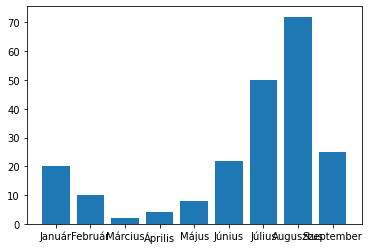

In [3]:
plt.bar(honapok, szabik)

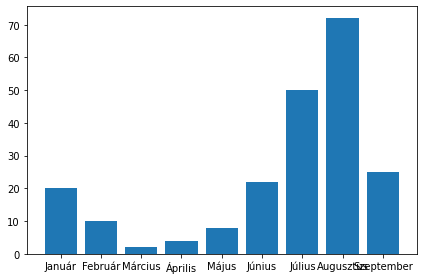

In [4]:
plt.bar(honapok, szabik)
plt.tight_layout()
plt.show()

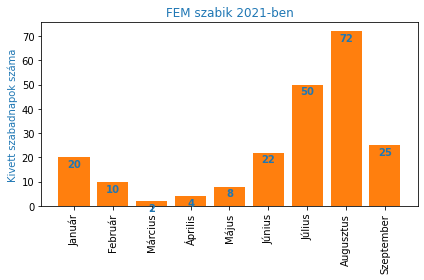

In [5]:
fig, ax = plt.subplots()
ax.bar(honapok, szabik, color='C1')
ax.set_title("FEM szabik 2021-ben", color='C0')
ax.set_ylabel("Kivett szabadnapok száma", color='C0')
# Rotate ticks
plt.xticks(rotation = 90)
# Add labeling
for i, v in enumerate(szabik):
    ax.text(i, v + -5, str(v), color='C0', fontweight='bold', ha='center', va='bottom')
# Auto labeling added from matplotlib verison 3.4 (see ax.bar_label())
plt.tight_layout()

Oszlopdiagrammoknál sokszor szeretnénk az adatokat tovább csoportosítani, hogy két adatsor egymáshoz képesti viszonyát vizsgáljuk.
Ennek a Megoldása MatPlotLibben valamivel komplikáltabb, mint ahogy annak lennie kellene, de természetesen ez is megoldható.
A trükk az, hogy az oszlopokat kézzel kicsit el kell tolni egymáshoz képest az X tengelyen, illetve a szélességüket is megfeleő módon be kell állítani.
### Adatok beolvasása

In [6]:
import csv
from os.path import join
with open(join('src','CAEszabi.csv')) as szabiFile:
    szabireader = csv.reader(szabiFile, delimiter=';')
    for row in szabireader:
        print(', '.join(row))

Month, FEM, BMW, COMP, ADMIN, SUM
Jan, 7, 0, 4, 9, 20
Febr, 4, 0, 0, 6, 10
Márc, 1, 0, 0, 1, 2
Ápr, 1, 1, 0, 2, 4
Máj, 3, 0, 2, 3, 8
Jún, 3, 5, 8, 6, 22
Júl, 10, 18, 10, 12, 50
Aug, 31, 16, 8, 17, 72
Szept, 13, 8, 4, 0, 25
Okt, 3, 3, 1, 3, 10
Nov, 0, 3, 4, 0, 7
Dec, 35, 30, 24, 15, 104
Unplanned, 44, 12, 24, 17, 97


In [8]:
from collections import defaultdict

szabiData = defaultdict(list)
months = []
with open('src/CAEszabi.csv') as szabiFile:
    szabireader = csv.DictReader(szabiFile, delimiter=';')
    for row in szabireader:
#         print(row)
        for group in ['FEM', 'BMW', 'COMP', 'ADMIN', 'SUM']:
            szabiData[group].append(int(row[group]))
        months.append(row['Month'])
    else:
        for group in ['FEM', 'BMW', 'COMP', 'ADMIN', 'SUM']:
            szabiData[group] = np.array(szabiData[group]) 
print(szabiData)
print(months)

defaultdict(<class 'list'>, {'FEM': array([ 7,  4,  1,  1,  3,  3, 10, 31, 13,  3,  0, 35, 44]), 'BMW': array([ 0,  0,  0,  1,  0,  5, 18, 16,  8,  3,  3, 30, 12]), 'COMP': array([ 4,  0,  0,  0,  2,  8, 10,  8,  4,  1,  4, 24, 24]), 'ADMIN': array([ 9,  6,  1,  2,  3,  6, 12, 17,  0,  3,  0, 15, 17]), 'SUM': array([ 20,  10,   2,   4,   8,  22,  50,  72,  25,  10,   7, 104,  97])})
['Jan', 'Febr', 'Márc', 'Ápr', 'Máj', 'Jún', 'Júl', 'Aug', 'Szept', 'Okt', 'Nov', 'Dec', 'Unplanned']


### Csoportosított oszlopdiagram

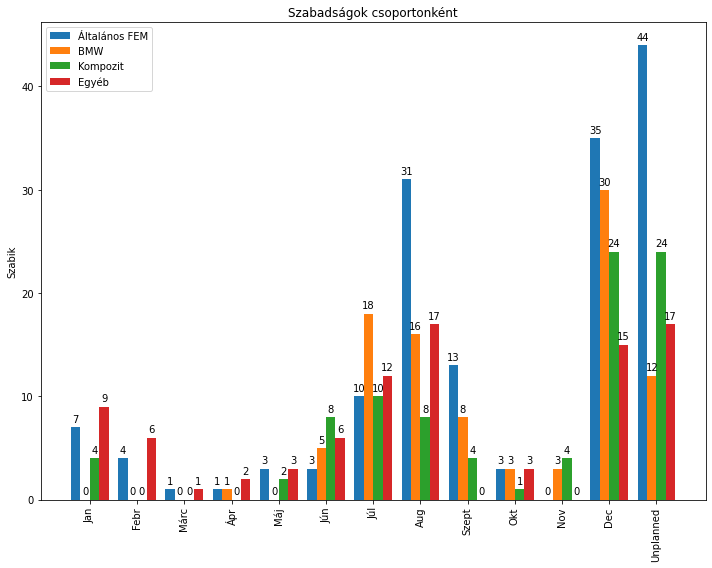

In [9]:
x = np.arange(len(months))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10,8))
femPlot = ax.bar(x - 3*width/2, height=szabiData['FEM'], width=width, label='Általános FEM')
bmwPlot = ax.bar(x - width/2, height=szabiData['BMW'], width=width, label='BMW')
compPlot = ax.bar(x + width/2, height=szabiData['COMP'], width=width, label='Kompozit')
adminPlot = ax.bar(x + 3*width/2, height=szabiData['ADMIN'], width=width, label='Egyéb')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Szabik')
ax.set_title('Szabadságok csoportonként')
ax.set_xticks(x)
ax.set_xticklabels(months)
ax.legend()

ax.bar_label(femPlot, padding=3)
ax.bar_label(bmwPlot, padding=3)
ax.bar_label(compPlot, padding=3)
ax.bar_label(adminPlot, padding=3)

plt.xticks(rotation = 90)

fig.tight_layout()
ax.legend = None
plt.show()

### Halmozott oszlopdiagram (új stílusban)

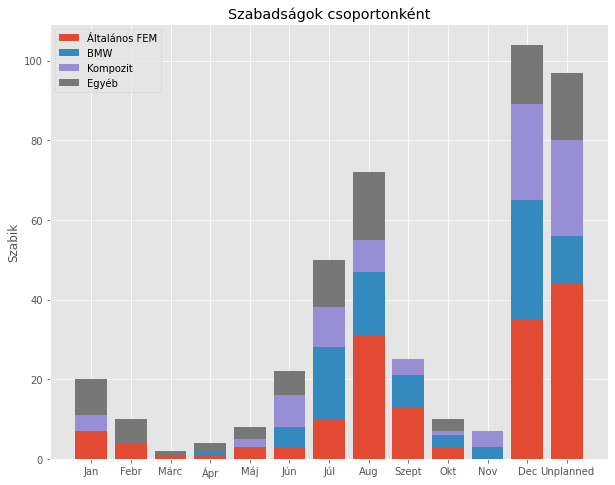

In [10]:
# Use an other plot style
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(10,8))
femPlot = ax.bar(x, height=szabiData['FEM'], bottom = 0,  label='Általános FEM')
bmwPlot = ax.bar(x, height=szabiData['BMW'], bottom = szabiData['FEM'], label='BMW')
compPlot = ax.bar(x, height=szabiData['COMP'], bottom = szabiData['FEM'] + szabiData['BMW'], label='Kompozit')
adminPlot = ax.bar(x, height=szabiData['ADMIN'], bottom = szabiData['FEM'] + szabiData['BMW'] + szabiData['COMP'],
                   label='Egyéb')

ax.set_ylabel('Szabik')
ax.set_title('Szabadságok csoportonként')
ax.set_xticks(x)
ax.set_xticklabels(months)
ax.legend()

Ugyanez a csoportok létszámára leosztva:

In [11]:
femNum = 7
bmwNum = 4
compNum = 4
adminNum = 3   

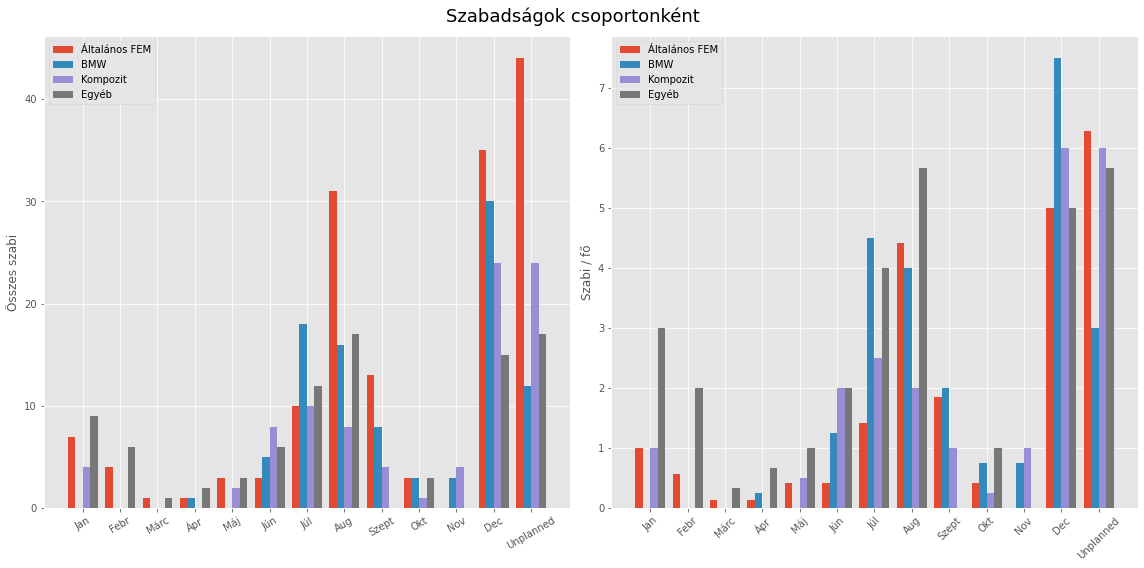

In [12]:
fig, ax = plt.subplots(1,2, figsize=(16,8), sharey=False)

femPlot = ax[0].bar(x - 3*width/2, height=szabiData['FEM'], width=width, label='Általános FEM')
bmwPlot = ax[0].bar(x - width/2, height=szabiData['BMW'], width=width, label='BMW')
compPlot = ax[0].bar(x + width/2, height=szabiData['COMP'], width=width, label='Kompozit')
adminPlot = ax[0].bar(x + 3*width/2, height=szabiData['ADMIN'], width=width, label='Egyéb')

femPlot = ax[1].bar(x - 3*width/2, height=szabiData['FEM']/femNum, width=width, label='Általános FEM')
bmwPlot = ax[1].bar(x - width/2, height=szabiData['BMW']/bmwNum, width=width, label='BMW')
compPlot = ax[1].bar(x + width/2, height=szabiData['COMP']/compNum, width=width, label='Kompozit')
adminPlot = ax[1].bar(x + 3*width/2, height=szabiData['ADMIN']/adminNum, width=width, label='Egyéb')

fig.suptitle('Szabadságok csoportonként', fontsize = 18)
ax[0].set_ylabel('Összes szabi')
ax[0].set_xticks(x)
ax[0].set_xticklabels(months, rotation=30)
ax[0].legend()
ax[1].set_ylabel('Szabi / fő')
ax[1].set_xticks(x)
ax[1].set_xticklabels(months, rotation=45)
ax[1].legend()


plt.tight_layout()

## Scattet plot
Amikor nem egy folytonos adatsort szeretnénk megjeleníteni, csak összetartozó pontpárokat, akkor a Scatter plot lehet megoldás. Használata szinte teljesen megegyezik a sima `plt.plot()`-tal, így csak röviden mutatom be.

Használata akkor a legelterjedtebb, amikor két változó közötti korrelációt szeretnénk vizualizálni, vagy esetleg kiugró értékeket ellenőriznénk.

In [13]:
plt.style.use('seaborn')

In [14]:
x_dat = [5, 7, 8, 5, 6, 7, 9, 2, 3, 4, 4, 4, 2, 6, 3, 6, 8, 6, 4, 1]
y_dat = [7, 4, 3, 9, 1, 3, 2, 5, 2, 4, 8, 7, 1, 6, 4, 9, 7, 7, 5, 1]

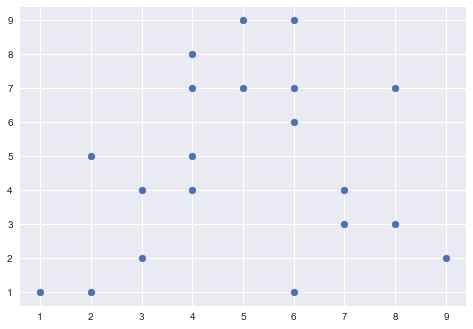

In [15]:
plt.scatter(x_dat, y_dat)

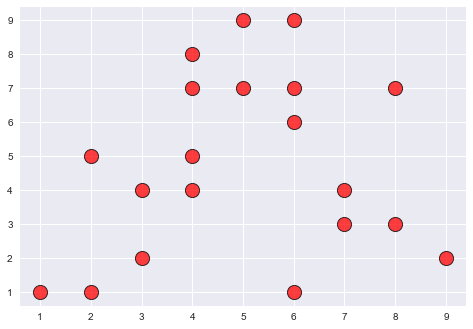

In [16]:
plt.scatter(x_dat, y_dat, s=200, c='red', edgecolor='black', linewidth=1, alpha=0.75)

A plotunkon az x-z pontokon kívül **akár még 2 másik dimenziót** is megjeleníthetünk a markerek méretét és színét változtatva:

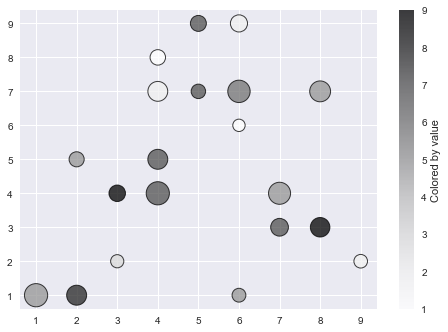

In [17]:
colors = [7, 5, 9, 7, 5, 7, 2, 5, 3, 7, 1, 2, 8, 1, 9, 2, 5, 6, 7, 5]
sizes = [209, 486, 381, 255, 191, 315, 185, 228, 174, 538, 239, 394, 399, 153, 273, 293, 436, 501, 397, 539]
plt.scatter(x_dat, y_dat, s=sizes, c=colors, edgecolor='black', linewidth=1, alpha=0.75)  #cmap='Greens'

cBar = plt.colorbar()
cBar.set_label('Colored by value')

# Available colormaps:
# https://matplotlib.org/stable/tutorials/colors/colormaps.html

Nézzünk meg egy valós adatsort, ami 1970 és 1981 között gyártott autók fogyaztását tartlamazza.

In [18]:
import seaborn as sns

mpg = sns.load_dataset('mpg')
mpg['l/100km'] = 235.215 / mpg['mpg']
mpg['weight-kg'] = mpg['weight'] * 0.45359
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,l/100km,weight-kg
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,13.067500,1589.37936
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,15.681000,1675.10787
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,13.067500,1558.53524
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,14.700938,1557.17447
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,13.836176,1564.43191


In [19]:
mpg['model_year'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

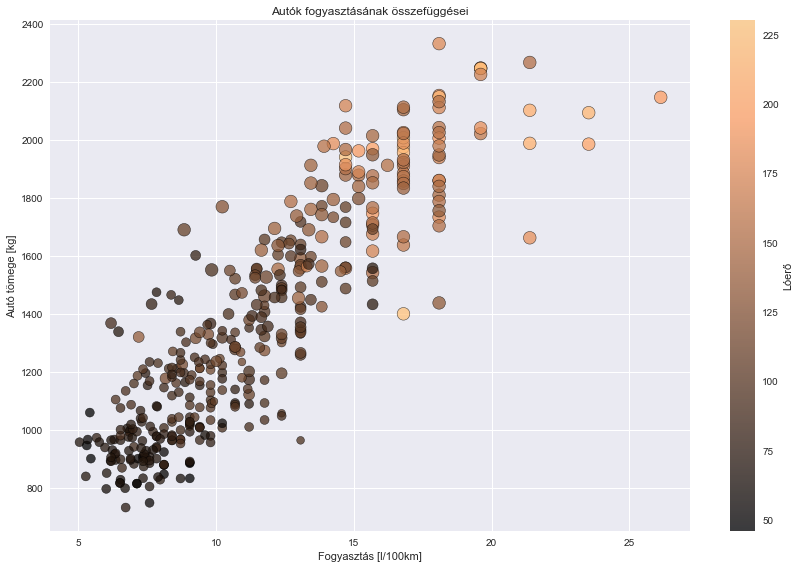

In [20]:
fig, ax = plt.subplots(figsize=(12,8))

mpgPlot = ax.scatter(mpg['l/100km'], mpg['weight-kg'], alpha=0.75, edgecolor='black', linewidth=0.5,
                     c=mpg['horsepower'], cmap='copper', s=mpg['cylinders']*20)
ax.set_xlabel('Fogyasztás [l/100km]')
ax.set_ylabel('Autó tömege [kg]')
ax.set_title('Autók fogyasztásának összefüggései')
cBar = fig.colorbar(mpgPlot)
cBar.set_label('Lóerő')
plt.tight_layout()

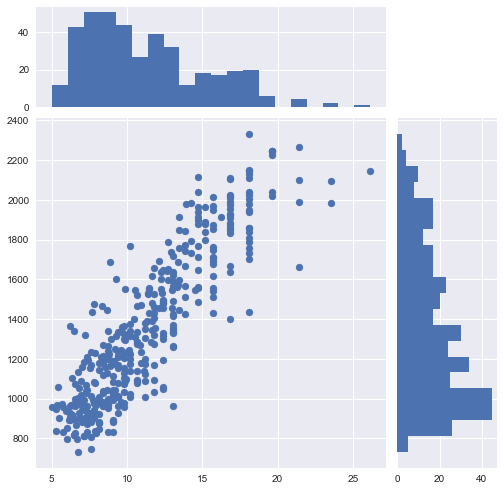

In [21]:
def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)

#     # now determine nice limits by hand:
#     binwidth = 0.25
#     xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
#     lim = (int(xymax/binwidth) + 1) * binwidth

#     bins = np.arange(-lim, lim + binwidth, binwidth)
#     ax_histx.hist(x, bins=bins)
#     ax_histy.hist(y, bins=bins, orientation='horizontal')
    ax_histx.hist(x, bins=20)
    ax_histy.hist(y, bins=20, orientation='horizontal')
    
#--------------------------- 
# start with a square Figure
fig = plt.figure(figsize=(8, 8))

# Add a gridspec with two rows and two columns and a ratio of 2 to 7 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(7, 2), height_ratios=(2, 7),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

# use the previously defined function
scatter_hist(mpg['l/100km'], mpg['weight-kg'], ax, ax_histx, ax_histy)

plt.show()

## Boxplot - Violinplot
A box és violin plot kategorizált adatok eloszlását mutatja. Segítségükkel jól összehasonlíthatóak a különböző kategóriák. A boxplot a kvartilisek elhelyezkedését jeleníti meg, a violinplot pedig az egész eloszlásról ad infomációt.

In [22]:
np.sort(mpg['cylinders'].unique())

array([3, 4, 5, 6, 8], dtype=int64)

In [23]:
cylinders = np.sort(mpg['cylinders'].unique())
data = [mpg[mpg['cylinders']==cylinder]['l/100km'] for cylinder in cylinders]

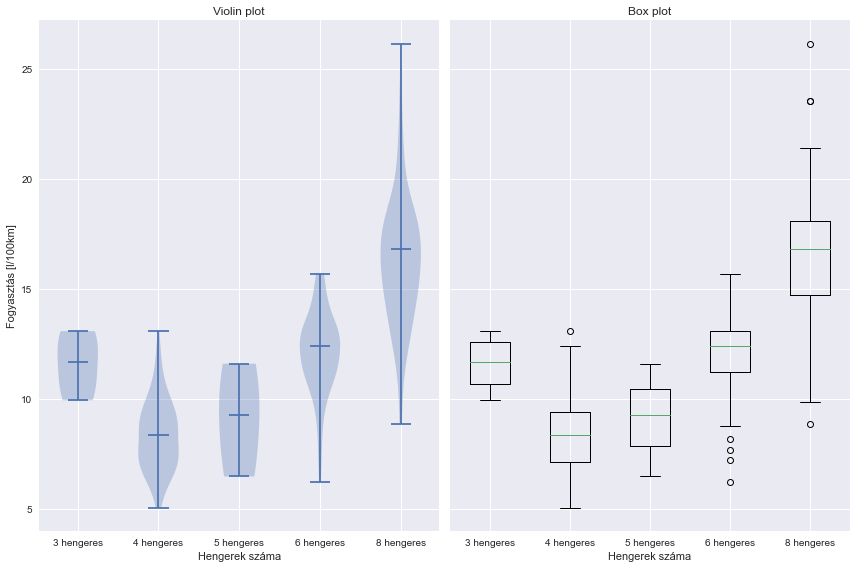

In [24]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 8), sharey=True)

# plot violin plot
axs[0].violinplot(data,
                  showmeans=False,
                  showmedians=True)
axs[0].set_title('Violin plot')
axs[0].set_ylabel('Fogyasztás [l/100km]')

# plot box plot
axs[1].boxplot(data)
axs[1].set_title('Box plot')


# add x-tick labels
plt.setp(axs, xticks=[y + 1 for y in range(len(data))],
         xticklabels=[f'{cylinder} hengeres' for cylinder in cylinders],
         xlabel='Hengerek száma')
plt.tight_layout()
plt.show()

Figyelni kell azonban az egyes kategóriákba sorolt elemek számára:

In [25]:
labels, counter = [], []
for dat, henger in zip(data, cylinders):
    print(f'A {henger} hengeres autókból {len(dat)} darab volt.')
    labels.append(f'{henger} hengeres')
    counter.append(len(dat))

A 3 hengeres autókból 4 darab volt.
A 4 hengeres autókból 204 darab volt.
A 5 hengeres autókból 3 darab volt.
A 6 hengeres autókból 84 darab volt.
A 8 hengeres autókból 103 darab volt.


## Pie chart
A kördiagram nem tipikusan a mérnöki szakmának a legelterjeddtebb plot típusa, de bizonyos adatok megjelenítéséhez előnyös lehet.

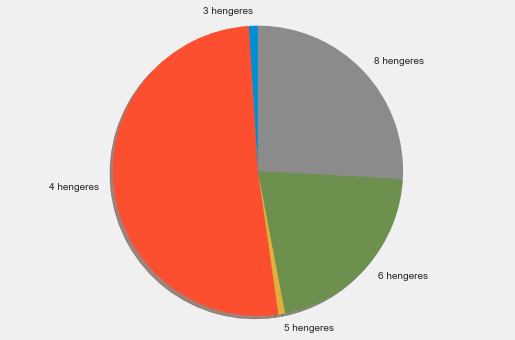

In [26]:
plt.style.use("fivethirtyeight")

# Pie chart, where the slices will be ordered and plotted counter-clockwise:

fig, ax = plt.subplots()
ax.pie(counter, labels=labels,shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

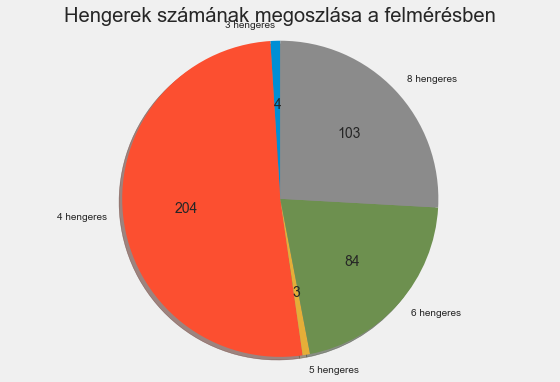

In [27]:
'''
Felirat értékkel, cím.
'''

fig, ax = plt.subplots()
ax.pie(counter, labels=labels, shadow=True, startangle=90,
       autopct=lambda p: '{:.0f}'.format(p * sum(counter) / 100))
ax.axis('equal')
ax.set_title('Hengerek számának megoszlása a felmérésben')
plt.tight_layout()
plt.show()

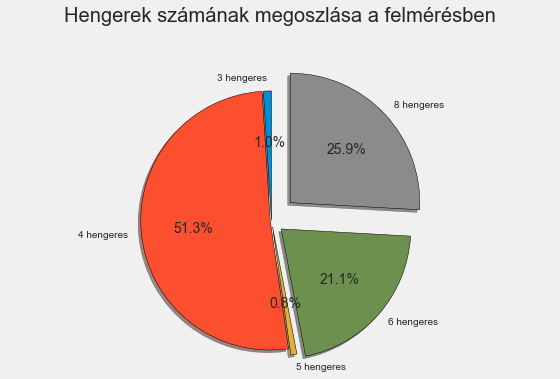

In [29]:
'''
Százalékos felirat, kiemelt cím, explode.
'''
fig, ax = plt.subplots()
ax.pie(counter, labels=labels, shadow=True, startangle=90,
       autopct='%1.1f%%', explode=[0, 0.01, 0.05, 0.1, 0.2], wedgeprops={'edgecolor': 'black'})
ax.axis('equal')
ax.set_title('Hengerek számának megoszlása a felmérésben', y=1.1) # Move the title higher
plt.tight_layout()
plt.show()

## Időjelek megjelenítése

In [39]:
import pandas as pd
df = pd.read_csv('src/covid_impact_on_airport_traffic.csv')
df.head()

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
0,Daily,2020-04-03,1.0,Kingsford Smith,64,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
1,Daily,2020-04-13,1.0,Kingsford Smith,29,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
2,Daily,2020-07-10,1.0,Kingsford Smith,54,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
3,Daily,2020-09-02,1.0,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
4,Daily,2020-10-31,1.0,Kingsford Smith,22,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."


In [42]:
df['Date'] = pd.to_datetime(df.Date)
df.sort_values(by='Date', inplace=True)
df.head()

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
302,Daily,2020-03-16,1.0,Santiago International Airport,96,POINT(-70.7942372739446 -33.3907265266744),Santiago,Santiago Province,CL,Chile,"POLYGON((-70.8043956756592 -33.3719683869737, ..."
1713,Daily,2020-03-16,1.0,Halifax International,72,POINT(-63.5116720134583 44.8830168353507),Halifax,Nova Scotia,CA-NS,Canada,"POLYGON((-63.5266613960266 44.8984438169036, -..."
3963,Daily,2020-03-16,1.0,Hartsfield-Jackson Atlanta International,92,POINT(-84.4279188822754 33.6410758198944),College Park,Georgia,US-GA,United States of America (the),"POLYGON((-84.4299745559692 33.657852680999, -8..."
2989,Daily,2020-03-16,1.0,Los Angeles International,98,POINT(-118.404993180627 33.941369379328),Los Angeles,California,US-CA,United States of America (the),"POLYGON((-118.439612388611 33.9517616366508, -..."
5701,Daily,2020-03-16,1.0,McCarran International,68,POINT(-115.14888081287 36.082853976328),Paradise,Nevada,US-NV,United States of America (the),"POLYGON((-115.158487558365 36.1007120735771, -..."


In [34]:
df.AirportName.unique()

array(['Kingsford Smith', 'Santiago International Airport',
       'Calgary International', 'Edmonton International',
       'Vancouver International', 'Winnipeg International',
       'Halifax International', 'Toronto Pearson',
       'Hamilton International', 'Montreal Mirabel', 'Montreal Trudeau',
       'Los Angeles International', 'San Francisco International',
       'Denver International', 'Miami International ',
       'Hartsfield-Jackson Atlanta International ',
       'Daniel K. Inouye International ', 'Chicago OHare International',
       'Boston Logan International ',
       'Detroit Metropolitan Wayne County ',
       'Charlotte Douglas International', 'Newark Liberty International ',
       'McCarran International', 'LaGuardia',
       'John F. Kennedy International',
       'Dallas/Fort Worth International ',
       'Washington Dulles International ',
       'Seattle-Tacoma International '], dtype=object)

In [45]:
dates = df['Date'].unique()
JFK = df[df['AirportName']=='John F. Kennedy International']['PercentOfBaseline']
LAX = df[df['AirportName']=='Los Angeles International']['PercentOfBaseline']

Text(0.5, 1.0, 'Repülőterek forgalmának százalékos változása a COVID hatására')

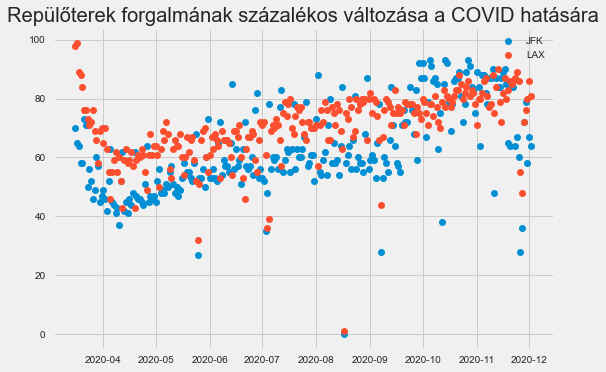

In [51]:
fig, ax = plt.subplots()

ax.plot_date(dates, JFK, label='JFK')
ax.plot_date(dates, LAX, label='LAX')
ax.legend()
ax.set_title('Repülőterek forgalmának százalékos változása a COVID hatására')